In [145]:
# Installation des bibliothèques NumPy et Pandas
!pip install numpy
!pip install pandas

In [146]:
#Etape 1 : Importer les librairies:
#Numpy pour manipuler notre Dataset en tant que matrice
#Pandas pour manipuler et analyser les données
#Matplotlib.pyplot pour visualiser nos donnees
#Seaborn pour des visualisations statistiques avancées

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
##dataset
#Charger le dataset depuis un fichier CSV en utilisant pandas
shoes_dataset = pd.read_csv('Shoe prices.csv')

In [148]:
#Afficher des informations sur le dataset pour comprendre sa structure
shoes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [149]:
#Afficher les noms des colonnes du dataset
shoes_dataset.columns

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')

In [150]:
#Vérifier les valeurs nulles dans chaque colonne du dataset
shoes_dataset.isnull().sum()

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

In [151]:
#Afficher des statistiques descriptives pour les colonnes numériques du dataset
## count: indique le nombre de valeurs non nulles pour chaque colonne.
## unique: indique le nombre de valeurs uniques pour chaque colonne.
## top :indique la valeur la plus fréquente pour chaque colonne.
## freq: indique la fréquence de la valeur la plus fréquente pour chaque colonne.
shoes_dataset.describe()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
count,1006,1006,1006,1006,1006,1006,1006,1006
unique,10,239,18,2,13,82,34,33
top,Nike,Sk8-Hi,Running,Men,US 8.5,Black,Mesh,$65.00
freq,118,39,332,535,132,178,308,121


In [152]:
# (nombre de lignes et de colonnes)
shoes_dataset.shape

(1006, 8)

In [153]:
#Afficher un exemple aléatoire de 4 lignes du dataset
shoes_dataset.sample(4)

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
716,Nike,Air Max 2090,Running,Men,US 11.5,Black/White,Mesh/Synthetic,$150.00
460,Vans,Era,Skate,Men,US 9.5,Black/White,Canvas,$50.00
419,Puma,Cali Sport,Lifestyle,Men,US 8.5,Black/White,Leather,$80.00
264,Adidas,NMD_R1,Running,Women,US 8.5,Pink,Knit,$140.00


In [154]:
# Supprimer la colonne 'Model' du dataset
shoes_dataset = shoes_dataset.drop('Model', axis=1)

In [155]:
#Afficher les cinq premières lignes du DATASET
shoes_dataset.head()

,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [156]:
# Brand
# Compter le nombre d'occurrences de chaque valeur dans la colonne 'Brand'
shoes_dataset['Brand'].value_counts()

Brand
Nike           118
Adidas         100
Reebok         100
Converse       100
Puma           100
Vans           100
New Balance    100
Asics          100
Fila            99
Skechers        89
Name: count, dtype: int64

<Axes: xlabel='Brand'>

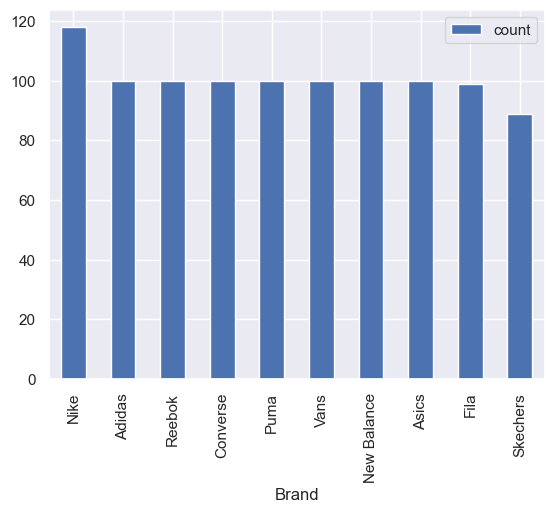

In [157]:
#Créer un graphique en barres pour visualiser les occurrences de chaque marque
shoes_dataset['Brand'].value_counts().plot(kind='bar', legend='false')

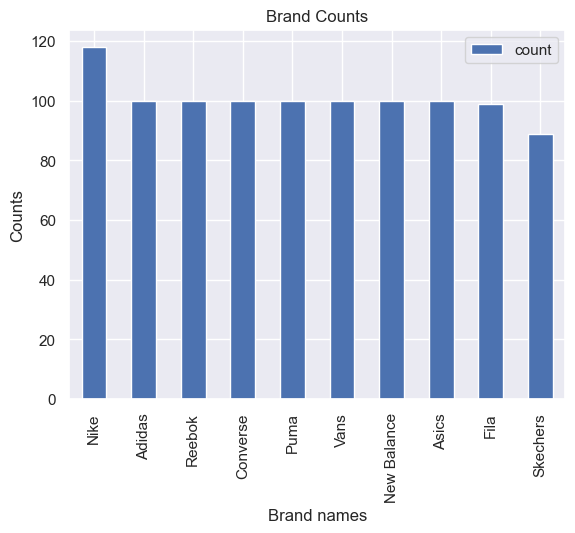

In [158]:
shoes_dataset['Brand'].value_counts().plot(kind='bar', legend='False')
plt.title('Brand Counts')    #Ajouter un titre au graphique
plt.xlabel('Brand names')    #Étiquette indiquant les noms des marques sur l'axe des abscisses
plt.ylabel('Counts')         #Étiquette indiquant le nombre d'occurrences sur l'axe des ordonnées
plt.show()                   #Afficher le graphique

In [159]:
# Type
#Convertir toutes les valeurs de la colonne 'Type' en minuscules
shoes_dataset['Type'] = shoes_dataset['Type'].str.lower()

In [160]:
#Compter le nombre d'occurrences de chaque valeur dans la colonne 'Type'
shoes_dataset['Type'].value_counts()

Type
running           332
casual            243
skate             100
fashion            86
lifestyle          76
basketball         52
walking            46
training           34
crossfit           14
trail               6
weightlifting       4
trail running       3
slides              3
retro               3
hiking              2
cross-training      1
racing              1
Name: count, dtype: int64

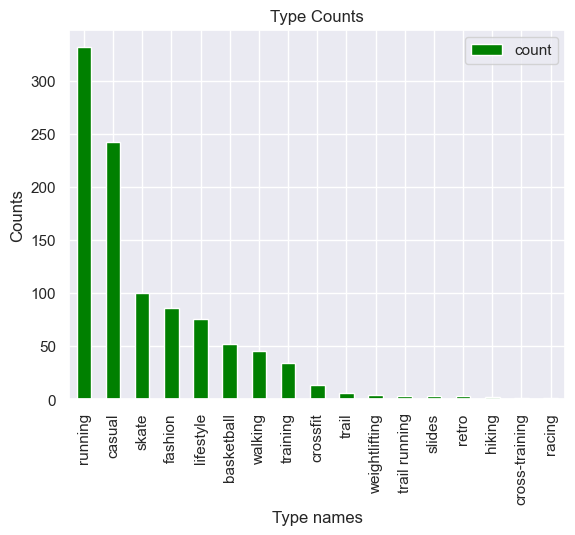

In [161]:
## Créer un graphique en barres pour visualiser ces occurrences
shoes_dataset['Type'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('Type Counts') ## Ajouter un titre au graphique
plt.xlabel('Type names') #Ajouter une étiquette à l'axe des abscisses
plt.ylabel('Counts')     #Ajouter une étiquette à l'axe des ordonnées
plt.show()               #Afficher le graphique

In [162]:
# La fonction 'add_type' est conçue pour catégoriser les valeurs de la colonne 'Type' du Dataset 'shoes_dataset'.
# Elle attribue la catégorie 'sport' à toutes les valeurs sauf 'casual', 'fashion', 'lifestyle', 'slides' et 'retro'.
# Ces dernières conservent leur valeur d'origine. La fonction est appliquée à la colonne 'Type' pour mise à jour.
def add_type(inpt):
    if inpt=='casual' or inpt=='fashion' or inpt=='lifestyle' or inpt=='slides' or inpt=='retro' :
        return inpt
    else :
        return 'sport'
#Appliquer la fonction 'add_type' à la colonne 'Type' du Dataset 'shoes_dataset'        
shoes_dataset['Type'] = shoes_dataset['Type'].apply(add_type)

In [163]:
##Compter le nombre d'occurrences de chaque valeur dans la colonne 'Type' après la mise à jour
shoes_dataset['Type'].value_counts()

Type
sport        595
casual       243
fashion       86
lifestyle     76
slides         3
retro          3
Name: count, dtype: int64

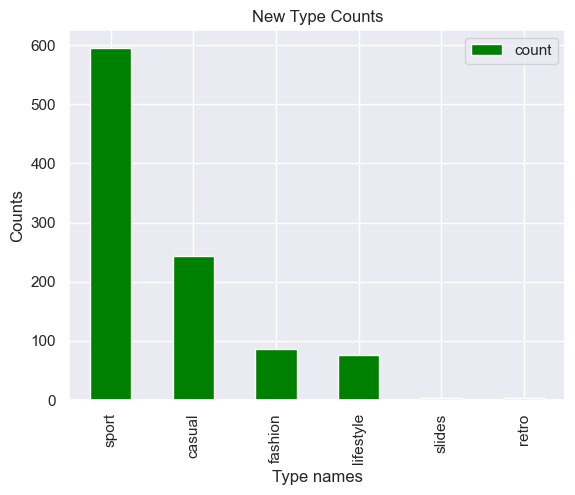

In [164]:
## Créer un graphique en barres pour visualiser le nombre d'occurrences de chaque type de chaussure dans le dataset, après la mise à jour de la colonne 'Type'.
# Utiliser la couleur verte pour les barres, avec un titre 'New Type Counts', une étiquette 'Type names' pour l'axe des abscisses, et une étiquette 'Counts' pour l'axe des ordonnées.
shoes_dataset['Type'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('New Type Counts')
plt.xlabel('Type names')
plt.ylabel('Counts')
plt.show()

In [165]:
## Gender
# Compter le nombre d'occurrences de chaque valeur dans la colonne 'Gender'
shoes_dataset['Gender'].value_counts()

Gender
Men      535
Women    471
Name: count, dtype: int64

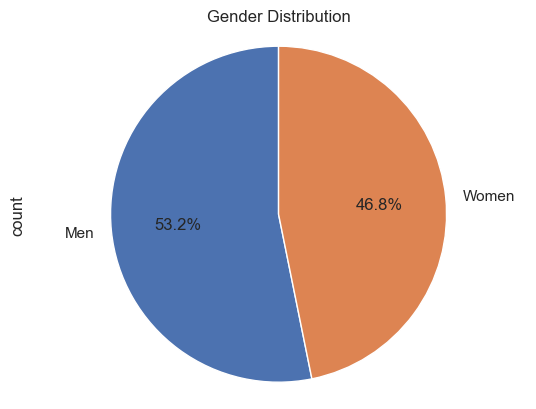

In [166]:
# Créer un graphique en secteurs pour visualiser la distribution des valeurs dans la colonne 'Gender' du dataset shoes_dataset.
# Utiliser l'option 'autopct' pour afficher les pourcentages sur les secteurs avec un format '%1.1f%%'.
# Utiliser 'startangle=90' pour commencer le premier secteur à un angle de 90 degrés (haut).
shoes_dataset['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle = 90)

## Ajouter un titre au graphique
plt.title('Gender Distribution')

## Assurer que le graphique est un cercle parfait
plt.axis('equal')
## Afficher le graphique
plt.show()

In [167]:
## Size
# Remplacer toutes les occurrences de 'US' par une chaîne vide '' dans la colonne 'Size'
shoes_dataset['Size'] = shoes_dataset['Size'].str.replace('US','')

In [168]:
## Afficher les premières lignes du Dataset shoes_dataset après avoir remplacé 'US' par une chaîne vide dans la colonne 'Size'
shoes_dataset.head()

,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,sport,Men,10,Red/Black,Leather,$170.00
1,Adidas,sport,Men,9.5,Black,Primeknit,$180.00
2,Reebok,casual,Men,11,White,Leather,$75.00
3,Converse,casual,Women,8,Navy,Canvas,$55.00
4,Puma,lifestyle,Women,7.5,Pink,Mesh,$80.00


In [169]:
# Convertir les valeurs de la colonne 'Size' en type de données float
shoes_dataset['Size'] = shoes_dataset['Size'].astype(float)

In [170]:
## Afficher des informations sur le Dataset shoes_dataset
shoes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1006 non-null   object 
 1   Type         1006 non-null   object 
 2   Gender       1006 non-null   object 
 3   Size         1006 non-null   float64
 4   Color        1006 non-null   object 
 5   Material     1006 non-null   object 
 6   Price (USD)  1006 non-null   object 
dtypes: float64(1), object(6)
memory usage: 55.1+ KB


In [171]:
## Color
# Convertir toutes les valeurs de la colonne 'Color' en minuscules
shoes_dataset['Color'] = shoes_dataset['Color'].str.lower()

In [172]:
# Compter le nombre d'occurrences de chaque valeur dans la colonne 'Color'
shoes_dataset['Color'].value_counts()

Color
black              178
white              139
grey               101
black/white        100
pink                64
                  ... 
khaki                1
black/blue           1
grey/purple          1
yellow/black         1
collegiate navy      1
Name: count, Length: 82, dtype: int64

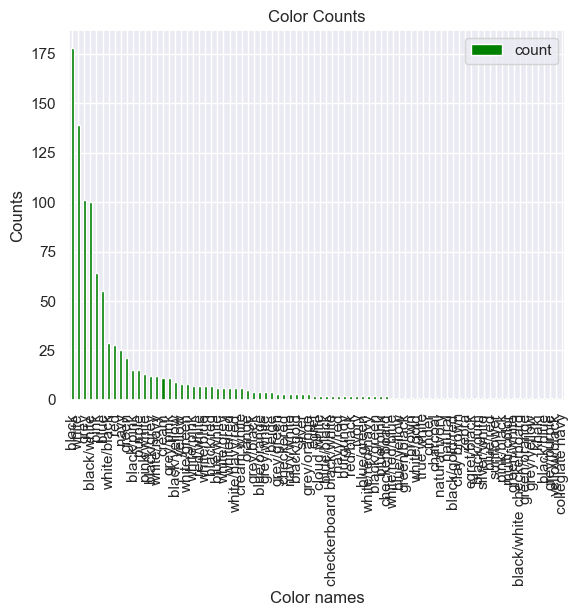

In [173]:
## Créer un graphique en barres pour visualiser le nombre d'occurrences de chaque couleur dans le dataset, avec la couleur des barres définie en vert.
# Ajouter un titre 'Color Counts', une étiquette 'Color names' pour l'axe des abscisses, et une étiquette 'Counts' pour l'axe des ordonnées.
shoes_dataset['Color'].value_counts().plot(kind='bar', legend='false', color  = 'green')
plt.title('Color Counts')
plt.xlabel('Color names')
plt.ylabel('Counts')
plt.show()

In [174]:
# Définir une fonction 'add_Color' pour catégoriser les couleurs dans la colonne 'Color' du DataFrame shoes_dataset.
# La fonction attribue la couleur d'origine aux valeurs 'black', 'white', 'grey', 'black/white' et 'pink', et les regroupe sous 'other' sinon.
# Appliquer la fonction 'add_Color' à la colonne 'Color' du DataFrame shoes_dataset pour mettre à jour les catégories de couleur.
def add_Color(inpt):
    if inpt=='black' or inpt=='white' or inpt=='grey' or inpt=='black/white' or inpt=='pink' :
        return inpt
    else :
        return 'other'
shoes_dataset['Color'] = shoes_dataset['Color'].apply(add_Color)

In [175]:
## Compter le nombre d'occurrences de chaque valeur dans la colonne 'Color' après la mise à jour
shoes_dataset['Color'].value_counts()

Color
other          424
black          178
white          139
grey           101
black/white    100
pink            64
Name: count, dtype: int64

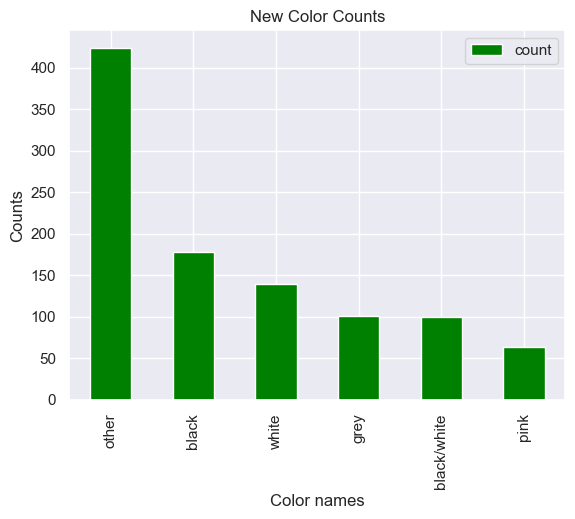

In [176]:
# Créer un graphique en barres pour visualiser le nombre d'occurrences de chaque couleur dans le dataset, après la mise à jour de la colonne 'Color'.
# Utiliser la couleur verte pour les barres, avec un titre 'New Color Counts', une étiquette 'Color names' pour l'axe des abscisses, et une étiquette 'Counts' pour l'axe des ordonnées.
shoes_dataset['Color'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('New Color Counts')
plt.xlabel('Color names')
plt.ylabel('Counts')
plt.show()

In [177]:
## Material
### Convertir toutes les valeurs de la colonne 'Material' en minuscules
shoes_dataset['Material'] = shoes_dataset['Material'].str.lower()

In [178]:
# Compter le nombre d'occurrences de chaque valeur dans la colonne 'Material'
shoes_dataset['Material'].value_counts()

Material
mesh                    308
leather                 168
canvas                  147
primeknit                68
leather/synthetic        47
synthetic                46
mesh/synthetic           36
suede/mesh               32
suede/canvas             29
suede                    19
flyknit                  17
knit                     15
nylon                    13
canvas/suede              9
synthetic/mesh            7
suede/leather             6
synthetic/leather         6
suede/nylon               5
flexweave                 4
leather/suede             3
nylon/suede               3
suede/textile             3
knit/synthetic            3
synthetic/textile         2
textile/leather           1
canvas/leather            1
flexweave/knit            1
mesh/leather              1
primeknit/synthetic       1
leather/mesh              1
textile                   1
flexweave/cushioning      1
flexweave/synthetic       1
mesh/suede                1
Name: count, dtype: int64

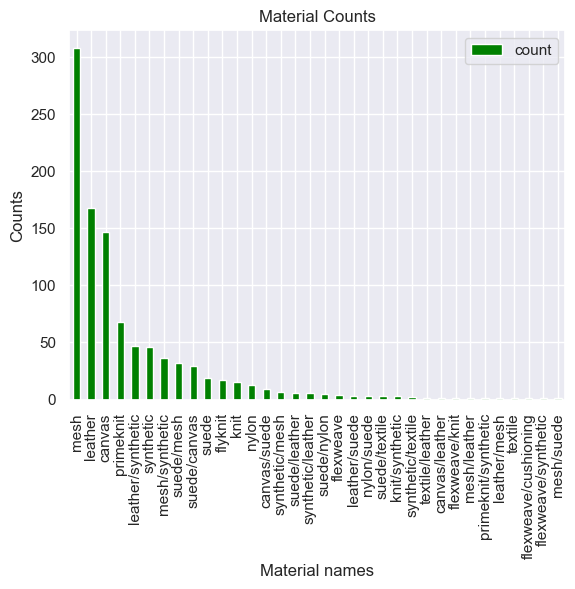

In [179]:
# Créer un graphique en barres pour visualiser le nombre d'occurrences de chaque matériau dans le dataset, avec la couleur des barres définie en vert.
# Ajouter un titre 'Material Counts', une étiquette 'Material names' pour l'axe des abscisses, et une étiquette 'Counts' pour l'axe des ordonnées.

shoes_dataset['Material'].value_counts().plot(kind='bar', legend='false', color = 'green')
plt.title('Material Counts')
plt.xlabel('Material names')
plt.ylabel('Counts')
plt.show()

In [180]:
# Définir une fonction 'add_Material' pour catégoriser les matériaux dans la colonne 'Material' du DataFrame shoes_dataset.
# La fonction attribue le matériau d'origine aux valeurs 'mech', 'leather', 'canvas', 'primeknit', 'synthetic', 'suede', 'knit' et 'nylon', et les regroupe sous 'other' sinon.
# Appliquer la fonction 'add_Material' à la colonne 'Material' du DataFrame shoes_dataset pour mettre à jour les catégories de matériaux.
def add_Material(inpt):
    if inpt=='mech' or inpt=='leather' or inpt=='canvas' or inpt=='primeknit' or inpt=='synthetic' or inpt=='suede' or inpt=='knit' or inpt=='nylon' :
        return inpt
    else :
        return 'other'
shoes_dataset['Material'] = shoes_dataset['Material'].apply(add_Material)

In [181]:
## Compter le nombre d'occurrences de chaque valeur dans la colonne 'Material' après la mise à jour
shoes_dataset['Material'].value_counts()

Material
other        530
leather      168
canvas       147
primeknit     68
synthetic     46
suede         19
knit          15
nylon         13
Name: count, dtype: int64

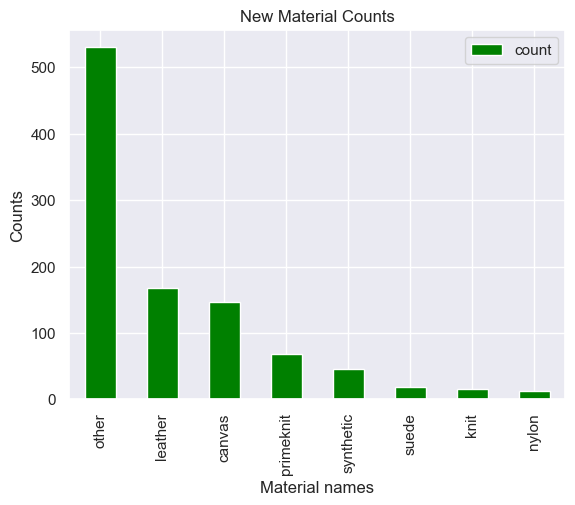

In [182]:
# Créer un graphique en barres pour visualiser le nombre d'occurrences de chaque matériau dans le dataset, après la mise à jour de la colonne 'Material'.
# Utiliser la couleur verte pour les barres, avec un titre 'New Material Counts', une étiquette 'Material names' pour l'axe des abscisses, et une étiquette 'Counts' pour l'axe des ordonnées.

shoes_dataset['Material'].value_counts().plot(kind='bar', legend='false',  color= 'green')
plt.title('New Material Counts')
plt.xlabel('Material names')
plt.ylabel('Counts')
plt.show()

In [183]:
## Price
## Convertir les valeurs de la colonne 'Price (USD)' en type de données float après avoir supprimé le symbole '$'
shoes_dataset['Price (USD)'] = shoes_dataset['Price (USD)'].str.replace('$','').astype(float)
#Afficher les cinq premières lignes du DataFrame shoes_dataset pour vérifier les modifications
shoes_dataset.head(5)

,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,sport,Men,10.0,other,leather,170.0
1,Adidas,sport,Men,9.5,black,primeknit,180.0
2,Reebok,casual,Men,11.0,white,leather,75.0
3,Converse,casual,Women,8.0,other,canvas,55.0
4,Puma,lifestyle,Women,7.5,pink,other,80.0


<Axes: xlabel='Brand', ylabel='Price (USD)'>

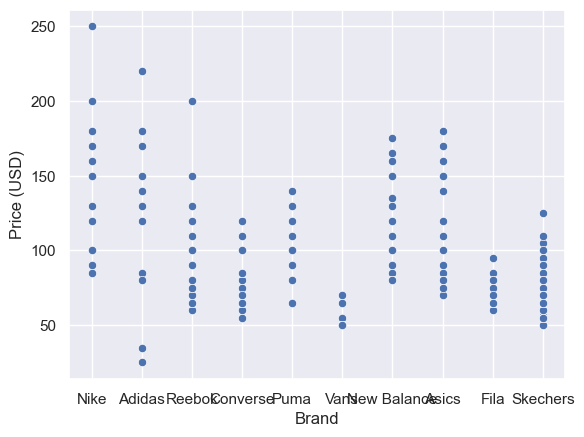

In [184]:
## Utiliser le style par défaut de Seaborn pour le graphique
sns.set()
### Créer un graphique de dispersion pour visualiser la relation entre les marques de chaussures et leurs prix
sns.scatterplot(data=shoes_dataset, x="Brand", y="Price (USD)")
#plt.show()

In [185]:
# Afficher des informations détaillées sur le DataFrame shoes_dataset
shoes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1006 non-null   object 
 1   Type         1006 non-null   object 
 2   Gender       1006 non-null   object 
 3   Size         1006 non-null   float64
 4   Color        1006 non-null   object 
 5   Material     1006 non-null   object 
 6   Price (USD)  1006 non-null   float64
dtypes: float64(2), object(5)
memory usage: 55.1+ KB


In [186]:
# Convertir les variables catégorielles en variables indicatrices (dummies) pour qu'elles puissent être utilisées dans des modèles d'apprentissage automatique
# Les nouvelles colonnes indicatrices sont de type entier (int)
shoes_dataset = pd.get_dummies(shoes_dataset,dtype=int)
# Afficher les cinq premières lignes du DataFrame shoes_dataset pour vérifier les modifications
shoes_dataset.head(5)
# Afficher des informations détaillées sur le DataFrame shoes_dataset après la transformation en variables indicatrices
shoes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size                1006 non-null   float64
 1   Price (USD)         1006 non-null   float64
 2   Brand_Adidas        1006 non-null   int32  
 3   Brand_Asics         1006 non-null   int32  
 4   Brand_Converse      1006 non-null   int32  
 5   Brand_Fila          1006 non-null   int32  
 6   Brand_New Balance   1006 non-null   int32  
 7   Brand_Nike          1006 non-null   int32  
 8   Brand_Puma          1006 non-null   int32  
 9   Brand_Reebok        1006 non-null   int32  
 10  Brand_Skechers      1006 non-null   int32  
 11  Brand_Vans          1006 non-null   int32  
 12  Type_casual         1006 non-null   int32  
 13  Type_fashion        1006 non-null   int32  
 14  Type_lifestyle      1006 non-null   int32  
 15  Type_retro          1006 non-null   int32  
 16  Type_s

In [187]:
# Créer un DataFrame 'x' en supprimant la colonne 'Price (USD)' du Dataset shoes_dataset
x = shoes_dataset.drop('Price (USD)', axis=1)
x

,Size,Brand_Adidas,Brand_Asics,Brand_Converse,Brand_Fila,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Skechers,...,Color_pink,Color_white,Material_canvas,Material_knit,Material_leather,Material_nylon,Material_other,Material_primeknit,Material_suede,Material_synthetic
0,10.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11.0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,8.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7.5,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,10.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1002,9.5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1003,7.5,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1004,8.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [188]:
 #Créer une série 'y' contenant les valeurs de la colonne 'Price (USD)' du DataFrame shoes_dataset
y = shoes_dataset['Price (USD)']
y

0       170.0
1       180.0
2        75.0
3        55.0
4        80.0
        ...  
1001    130.0
1002    160.0
1003     70.0
1004     55.0
1005    170.0
Name: Price (USD), Length: 1006, dtype: float64


### **En résumé, dans ce travail, nous avons effectué les étapes suivantes :**

1-Nettoyage et préparation des données des chaussures pour l'analyse.

2-Exploration des tendances pour identifier des relations clés entre les caractéristiques des chaussures.

3-Séparation des données en variables d'entrée (X) et variables cibles (Y), essentielle pour la modélisation.
## L'objectif principal était de préparer les données pour prédire avec précision les prix des chaussures.
